In [1]:
#Iris flowers project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('C:\\Users\\hp\Desktop\\MLDeep projects data\\Irisflowers\\Iris.csv')

In [9]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
#compter les valeurs manquantes

In [23]:
data = pd.DataFrame(data=data)
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [24]:
# on a 3 types de fleurs .chaque type a 50 exemples

In [26]:
data['SepalLengthCm'].isnull().sum()

0

In [27]:
data['SepalWidthCm'].isnull().sum()

0

In [28]:
data['PetalLengthCm'].isnull().sum()

0

In [29]:
data['PetalWidthCm'].isnull().sum()

0

In [30]:
#complete data

In [31]:
#puisque le machine learning ne comprend que des valeurs numériques donc on doit convertir le dernier colonne (Species)
#on effectue par exemple a :
#Iris-setosa 0
#Iris-virginica 1
#Iris-versicolor 2

In [38]:
data = data.replace({'Iris-setosa' : 0 ,'Iris-virginica' : 1 ,'Iris-versicolor' : 2})

In [39]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [40]:
#bien 

In [41]:
#on va plotter quelques relations

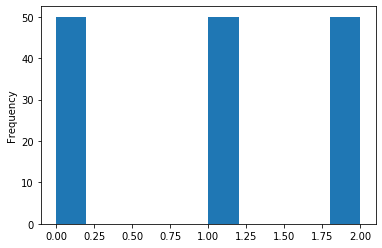

In [44]:
data['Species'].plot(kind = 'hist')
plt.show()

In [45]:
#puique le dataset est trés siple on va directement entrer dans le vif de sujet

In [50]:
data = data.drop(['Id'] ,axis = 1)

In [51]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


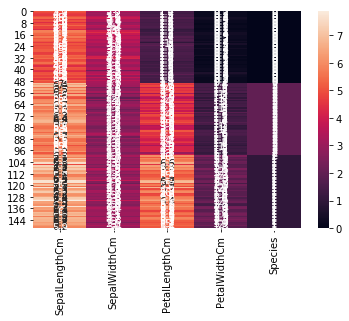

In [52]:
sns.heatmap(data, annot=True)

In [53]:
# 150 différent valeurs des 'Length' et 'Width' donc c'est une mauvaise idée de printer la matrice de corrélation

In [56]:
#on va utilse plusieurs modéles et on va comparer leur précision

In [57]:
#on va segmenter les données a 2 :train et test

In [60]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [61]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
y = data['Species']

In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7,random_state = 42)

In [66]:
x_train.shape

(105, 4)

In [67]:
x_test.shape

(45, 4)

In [68]:
#model 1

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3 , random_state = 17)

In [71]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [72]:
y_pred = clf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,y_pred)

1.0

In [75]:
# c'est trés bien on a une probabilité 100% que le modéle va nous donner une réponse juste

In [76]:
#mais on va éxécuter des autres modéles aussi juste pour prendre une idée

In [77]:
#model 2

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(random_state = 42 ,criterion = 'entropy',max_depth = 4)

In [81]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
y_pred = rfc.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred)

1.0

In [84]:
#model 3

In [85]:
#le dernier modéle puisque cette dataset est simple

In [89]:
from sklearn.neighbors import KNeighborsClassifier 

In [90]:
knn = KNeighborsClassifier(n_neighbors = 10, p=2, metric='minkowski')

In [91]:
knn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [92]:
y_pred = knn.predict(x_test)

In [93]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [94]:
#excellent mais on va chercher le meilleur nombre de voisin qu'on peut utiliser

In [97]:
scores = []
for k in range(5,30):
    knn = KNeighborsClassifier(n_neighbors = k, p=2, metric='minkowski')
    knn.fit(x_test,y_test)
    y_pred = knn.predict(x_test)
    m = accuracy_score(y_test,y_pred)
    scores.append(m)
scores


[1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.8,
 0.8,
 0.8,
 0.8]

In [98]:
# donc le meilleur choix est 5 ou 6 ou 7 parmi notre intervalle

In [99]:
#Fin